In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [249]:
df = pd.read_csv('최종데이터.csv')

In [254]:
df[(df['date_time'] >= '2012-06-01') & (df['date_time'] < '2012-10-01')]

,date_time,H_ID,APT,size,person,hoilday,month,weekday,hour,minute,...,power_rice,temp,washer,air,rice,air_rice,air_washer,washer_rice,all,all_not
0,2012-06-01 00:00:00,28,0,29,2,0,6,4,0,0,...,0.042,30.6,0,0,0,0,0,1,0,0
1,2012-06-01 00:00:00,62,1,39,4,0,6,4,0,0,...,0.006,30.6,0,0,1,0,0,0,0,0
2,2012-06-01 00:00:00,197,1,19,2,0,6,4,0,0,...,0.036,30.6,0,0,1,0,0,0,0,0
3,2012-06-01 00:10:00,28,0,29,2,0,6,4,0,1,...,0.008,30.6,0,0,0,0,0,1,0,0
4,2012-06-01 00:10:00,62,1,39,4,0,6,4,0,1,...,0.013,30.6,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73237,2012-09-30 23:40:00,29,1,19,2,1,9,6,23,4,...,0.005,33.2,0,0,0,0,0,0,1,0
73238,2012-09-30 23:40:00,62,1,39,4,1,9,6,23,4,...,0.001,28.1,0,0,0,1,0,0,0,0
73239,2012-09-30 23:50:00,1,1,29,2,1,9,6,23,5,...,0.006,25.5,0,0,1,0,0,0,0,0
73240,2012-09-30 23:50:00,29,1,19,2,1,9,6,23,5,...,0.004,33.2,0,0,0,0,0,1,0,0


In [231]:
df = df.drop(['date_time', 'H_ID', 'power_washer', 'power_air', 'power_rice'], axis=1)

In [183]:
train = df[(df['date_time'] <= '2012-08-20') | (df['date_time'] >= '2012-09-10')]
test = df[(df['date_time'] > '2012-08-20') & (df['date_time'] < '2012-09-10')]

In [232]:
labels = df.iloc[:, 9:]
features = df.iloc[:, :9]

In [233]:
def get_on(row):
    for c in labels.columns:
        if row[c]==1:
            return c

In [234]:
label = labels.apply(get_on, axis=1)

In [235]:
df = pd.concat([features, label], axis=1).rename(columns={0:'target'})

In [236]:
df['target'].unique()

array(['washer_rice', 'rice', 'all', 'air_rice', 'washer', 'air',
       'all_not', 'air_washer'], dtype=object)

In [237]:
df['target'] = df['target'].replace({'air':'0', 'rice':'1', 'washer':'2',
                                     'air_rice':'3', 'air_washer':'4', 'washer_rice':'5',
                                     'all':'6', 'all_not':'7'})

In [238]:
df

,APT,size,person,hoilday,month,weekday,hour,minute,temp,target
0,0,29,2,0,6,4,0,0,30.6,5
1,1,39,4,0,6,4,0,0,30.6,1
2,1,19,2,0,6,4,0,0,30.6,1
3,0,29,2,0,6,4,0,1,30.6,5
4,1,39,4,0,6,4,0,1,30.6,6
...,...,...,...,...,...,...,...,...,...,...
78839,0,39,4,1,10,6,23,4,28.1,7
78840,1,39,4,1,10,6,23,5,28.1,0
78841,1,29,2,1,10,6,23,5,28.1,7
78842,1,19,2,1,10,6,23,5,33.2,6


In [239]:
train, test = train_test_split(df, test_size=0.3, stratify=df[['month']], random_state=37)

#### use 현시간의 사용여부로 변경
#### 8월 10일 ~ 20일 정도를 테스트로 활용
#### 여러 가전제품 agg

In [240]:
train

,APT,size,person,hoilday,month,weekday,hour,minute,temp,target
30560,1,19,2,0,7,0,8,2,38.3,6
34985,0,29,2,0,8,4,18,3,35.7,3
43386,1,19,2,0,8,1,9,1,35.7,6
40851,0,29,2,0,8,4,6,0,35.7,5
26732,0,29,2,0,7,2,13,4,33.2,5
...,...,...,...,...,...,...,...,...,...,...
19896,1,19,2,0,7,1,20,1,35.7,6
15378,1,39,2,0,7,2,22,5,28.1,1
21116,0,29,2,0,7,3,6,4,33.2,5
7379,1,29,2,0,6,3,23,4,33.2,2


In [241]:
test

,APT,size,person,hoilday,month,weekday,hour,minute,temp,target
42986,1,39,2,0,8,0,18,4,33.2,5
72101,1,39,4,0,9,3,23,3,28.1,3
51618,1,19,2,1,8,6,10,2,35.7,6
17250,1,29,2,1,7,6,2,5,28.1,7
72135,1,39,4,0,9,4,2,2,28.1,3
...,...,...,...,...,...,...,...,...,...,...
74896,1,19,2,0,10,3,10,5,33.2,6
53226,1,39,4,0,8,1,9,5,33.2,3
73285,1,39,4,0,10,0,2,2,28.1,3
72890,1,39,4,1,9,6,4,2,28.1,0


In [242]:
columns = ['target']

X_train = train.drop(columns, axis=1)
X_test = test.drop(columns, axis=1)

y_train = train[columns]
y_test = test[columns]

In [157]:
columns = ['washer', 'air', 'rice', 'air_rice', 'air_washer', 'washer_rice', 'all', 'all_not']

X_train = train.drop(columns, axis=1)
X_test = test.drop(columns, axis=1)

y_train = train[columns]
y_test = test[columns]

In [245]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
from lightgbm import LGBMClassifier

In [260]:
model=LGBMClassifier(n_estimators=3000)
model.fit(X_train, y_train, verbose=100)

pred = model.predict(X_test)

print(confusion_matrix(pred, y_test), '\n',classification_report(pred, y_test))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[ 132   87   23  183   27   23   21  131]
 [ 141 3917   89 1137   39 1321  337  285]
 [  29   57  328   27   69  105   33  114]
 [ 346  688   25 2630   60  198  438  112]
 [  23   14   59   39  161   51   33   15]
 [  25  809  112  257   48 2459 1213   57]
 [  50  167   47  346   54 1135 2025   32]
 [ 141  180  142   78   32   74   31  593]] 
               precision    recall  f1-score   support

           0       0.15      0.21      0.17       627
           1       0.66      0.54      0.59      7266
           2       0.40      0.43      0.41       762
           3       0.56      0.58      0.57      4497
           4       0.33      0.41      0.36       395
           5       0.46      0.49      0.48      4980
           6       0.49      0.53      0.51      3856
           7       0.44      0.47      0.45      1271

    accuracy                           0.52     23654
   macro avg       0.44      0.46      0.44     23654
weighted avg       0.53      0.52      0.52     23654



In [247]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(pred, y_test), '\n',classification_report(pred, y_test))

<ipython-input-247-8b8f766323be>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


[[ 233   90   29  210   47   19   24  169]
 [ 115 3562   78 1035   30 1227  300  247]
 [  22   47  345   18   81  113   38   97]
 [ 280  849   21 2651   42  261  498   81]
 [  34   11   55   33  159   40   33   21]
 [  20  936  107  276   44 2393 1259   61]
 [  25  239   43  409   50 1238 1953   22]
 [ 158  185  147   65   37   75   26  641]] 
               precision    recall  f1-score   support

           0       0.26      0.28      0.27       821
           1       0.60      0.54      0.57      6594
           2       0.42      0.45      0.44       761
           3       0.56      0.57      0.57      4683
           4       0.32      0.41      0.36       386
           5       0.45      0.47      0.46      5096
           6       0.47      0.49      0.48      3979
           7       0.48      0.48      0.48      1334

    accuracy                           0.50     23654
   macro avg       0.45      0.46      0.45     23654
weighted avg       0.51      0.50      0.51     23654



In [101]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(pred, y_test), '\n',classification_report(pred, y_test))

[[36258 14112]
 [12280 25450]] 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73     50370
           1       0.64      0.67      0.66     37730

    accuracy                           0.70     88100
   macro avg       0.70      0.70      0.70     88100
weighted avg       0.70      0.70      0.70     88100



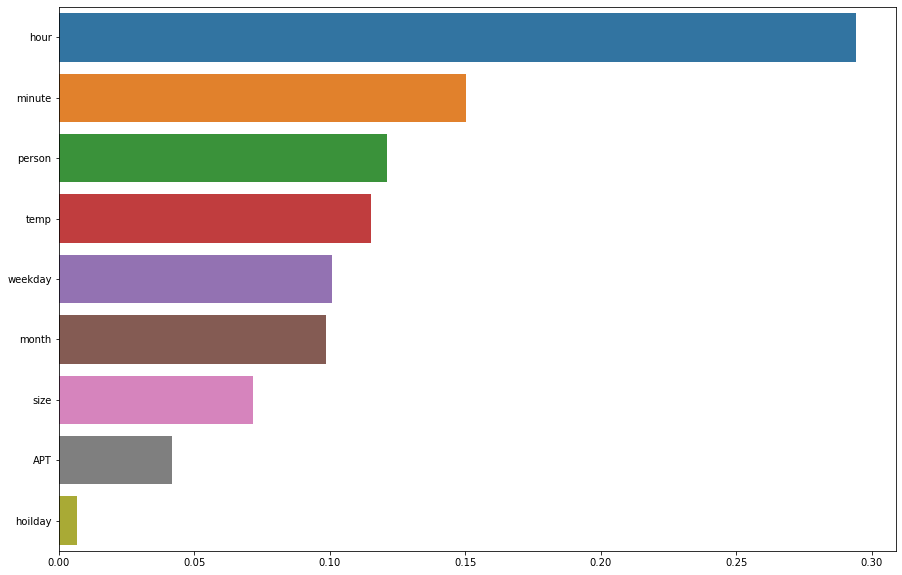

In [136]:
sr = pd.Series(model.feature_importances_, index=train.columns[:-1]).sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=sr.index, x=sr)
plt.show()